# Import libraries

In [1]:
#from matplotlib.pyplot import * 
#from numpy import *
import pynested_fit as pynf
import os

%matplotlib inline
#%matplotlib widget
#%matplotlib notebook

In [2]:
# Define the present path as root path
root_path = os.getcwd()
print(root_path)

path = root_path+'/set_of_datafiles'

/Users/martino/Nextcloud/CNRS/work/programs/nested_fit/nested_fit/examples/jupyter_notebooks


# Run the code in a specific directory

In [3]:
# Go to a define analysis
os.chdir(path)
print(path)

/Users/martino/Nextcloud/CNRS/work/programs/nested_fit/nested_fit/examples/jupyter_notebooks/set_of_datafiles


### Example of use of internal functions for two spectra with correlations

In [4]:
#### Define inputs using internal functions
conf = pynf.Configurator(
    datafiles=['gauss_bg-x0_300-sigma_20-A_300-p_to_bg_20-bin_1.dat', 'gauss_bg-x0_310-sigma_20-A_150-p_to_bg_10-bin_1.dat'], # Name of the data file
    filefmt='.tsv',             # Format of file (here for tab and space separated)
    specstr='x,c',              # Datafile layout (here ch. and counts in ch.)
    expressions=[               # Function expression in latex form
        r'gauss_1(x, A_1, x_1, s, b_1) = \texttt{GAUSS_IF}(x, x_1, A_1, s) + b_1',
        r'gauss_2(x, A_2, x_1, d, s, b_2) = \texttt{GAUSS_IF}(x, x_1+d, A_2, s) + b_2'], 
    params={                    # function expression in latex form
        'b_1': {'value': 0.01,  'step': -1, 'min': 0,   'max': 0.3 },
        'b_2': {'value': 0.01,  'step': -1, 'min': 0,   'max': 0.3 },
        'x_1': {'value': 454.6, 'step': -1, 'min': 0, 'max': 600 },
        'd'  : {'value': 0.2,   'step': -1, 'min': -10, 'max': 30 },
        'A_1': {'value': 300,   'step': -1, 'min': 0,   'max': 500},
        'A_2': {'value': 300,   'step': -1, 'min': 0,   'max': 500},
        's':   {'value': 20,    'step': -1, 'min': 10,  'max': 30}
    },
    data_1={'xmin': 0, 'xmax': 650},# Boundaries of data
    data_2={'xmin': 0, 'xmax': 650},# Boundaries of data
    livepoints=1000,                  # Number of live points
    search_method='SLICE_SAMPLING',   # Search method
    search_params=(0.5, 3),           # Parameters of chosen method
    conv_accuracy=1.E-05,             # Evidence final accuracy
    cluster_enable=False,             # clustering recognition on/off
    # cluster_method='k',             # method used
    # cluster_parameter1=0.5,         # method parameter 1 (if needed)
    # cluster_parameter2=0.2,         # method parameter 1 (if needed)
)

In [5]:
# Run the code

# For visualising the progress of the execution use this command
out = conf.sample(output_mode='live')

# For visualising the progress graphycally (not working in Google Colab), use
# out = conf.sample(output_mode='full')

# If nothing shows, use simply the command (symlink to created or version to be used)
# Create the command to run nested fit in case of need
# run_nested_fit = os.system('nested_fit'+pynf.__version__)
# run_nested_fit

# For silently running the code and save the raw output in a dictionnary, use this command
#out = conf.sample(output_mode='none')

========= Parsing result =========
     Latex input: \texttt{GAUSS_IF}(x, x_1, A_1, s) + b_1
Infix expression: GAUSS_IF(x,x1,A1,s)+b1
      Parameters: A_1, b_1, s, x_1
========= Parsing result =========
     Latex input: \texttt{GAUSS_IF}(x, x_1+d, A_2, s) + b_2
Infix expression: GAUSS_IF(x,x1+d,A2,s)+b2
      Parameters: A_2, b_2, d, s, x_1
| N. try:  1 | N. step:        100 | Min. loglike:   -2401.246311857112232 | Evidence:   -2412.232010397150589 | Ev. step:   -2412.343461666572239 | Ev. pres. acc.:  1.8730984E+03 | Typical eff.: 1.0000 |                
| N. try:  1 | N. step:        200 | Min. loglike:   -2221.630878451135686 | Evidence:   -2228.339740940114098 | Ev. step:   -2228.830179497782410 | Ev. pres. acc.:  1.6891062E+03 | Typical eff.: 0.6000 |                
| N. try:  1 | N. step:        300 | Min. loglike:   -2136.394072822697126 | Evidence:   -2143.323388457235069 | Ev. step:   -2144.766355633367311 | Ev. pres. acc.:  1.6039898E+03 | Typical eff.: 0.7500 |         

# Visualize the results

In [6]:
# Load the nested output data
# The available parameters and other variables that can be plotted are listed
an=pynf.Analysis()

Current path =  .
['A_1', 'x_1', 's', 'b_1', 'A_2', 'd', 'b_2']
Index(['weight', 'lnlikelihood', 'A_1', 'x_1', 's', 'b_1', 'A_2', 'd', 'b_2'], dtype='object')
Available parameters : ['weight', 'lnlikelihood', 'A_1', 'x_1', 's', 'b_1', 'A_2', 'd', 'b_2']


1 max
nf_output_data_max_1.dat


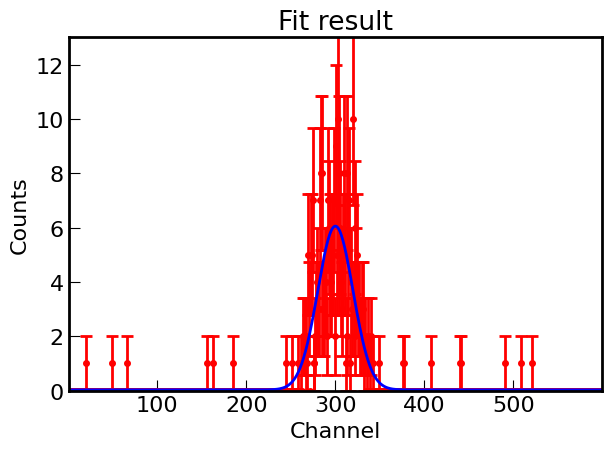

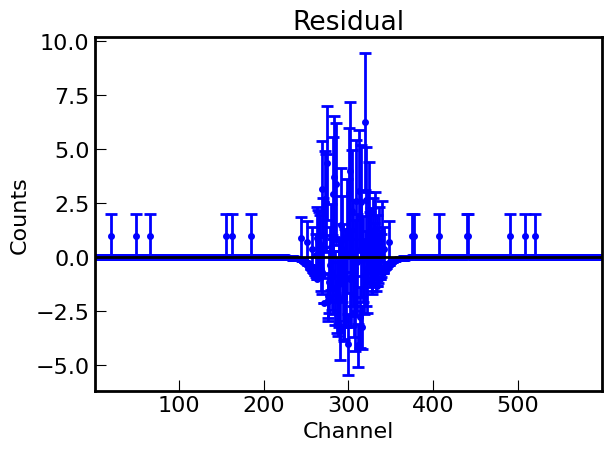

In [7]:
# Plot the data with the best fit (parameters corresponding to the maximum value of the data) and residual
# Other choices are median and mean parameters values selectable with "typeof='mean'" and "typeof='median'"
an.plot(nset=1)

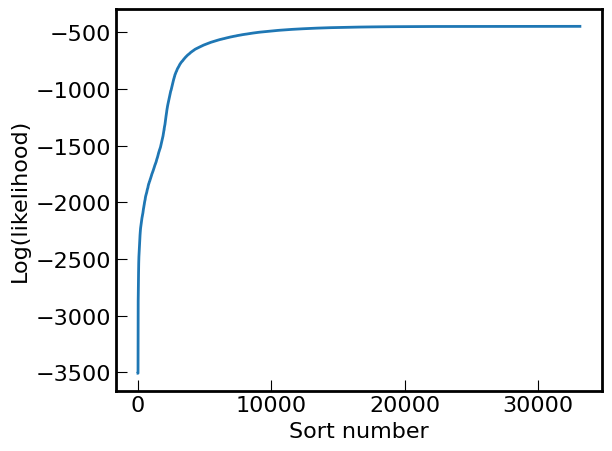

In [8]:
# Plot the likelihood sampling 
an.plot_like()

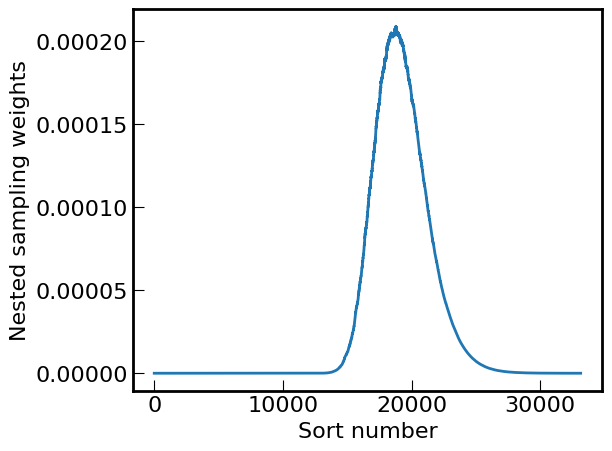

In [9]:
# Plot the weights of nested sampling corresponding to w_n = Delta X_n L_n
an.plot_weights()

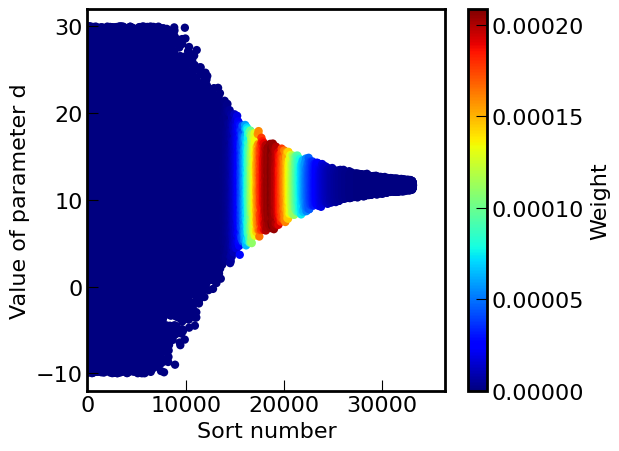

In [10]:
# Plot the parameter convergence
# Colored regions correspond to the high value of the weights
an.plot_par('d')

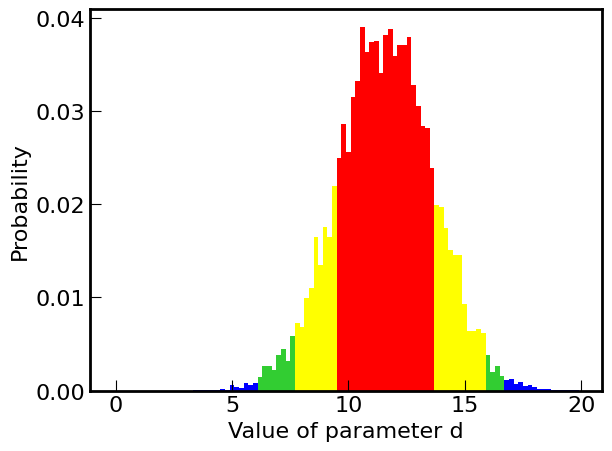

In [11]:
# Plot one parameter histogram
# Red, yellow and green region correspond to 1,2,3 sigmas
an.histo('d',bins=100,xmin=0,xmax=20)

/opt/homebrew/lib/python3.11/site-packages/anesthetic/samples.py:1286: RuntimeWarning: 34 out of 33145 samples have logL <= logL_birth,
34 of which have logL == logL_birth.
This may just indicate numerical rounding errors at the peak of the likelihood, but further investigation of the chains files is recommended.
Dropping the invalid samples.
  warnings.warn("%i out of %i samples have logL <= logL_birth,"


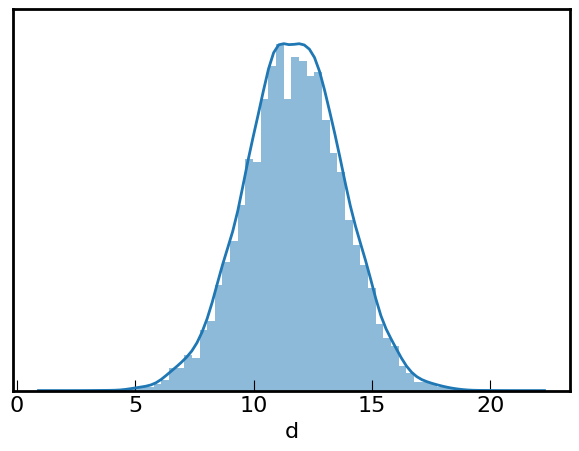

In [12]:
# Plot one parameter interpolated histogram using getdist
# Note: this is a third part function and it requires to specify the path explicitally
an.histo_interp('d')

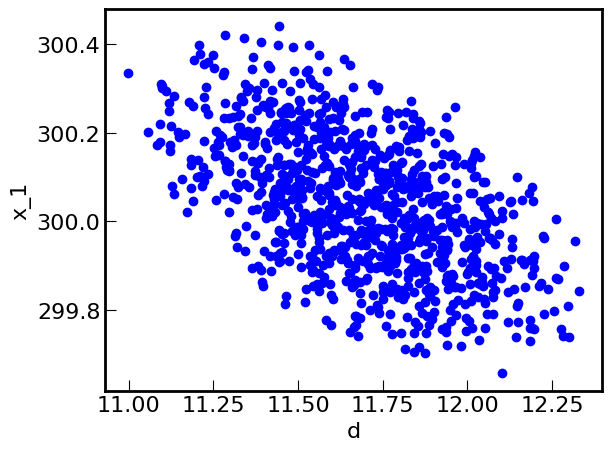

In [13]:
an.plot_live('d','x_1')

/opt/homebrew/lib/python3.11/site-packages/anesthetic/samples.py:1286: RuntimeWarning: 34 out of 33145 samples have logL <= logL_birth,
34 of which have logL == logL_birth.
This may just indicate numerical rounding errors at the peak of the likelihood, but further investigation of the chains files is recommended.
Dropping the invalid samples.
  warnings.warn("%i out of %i samples have logL <= logL_birth,"


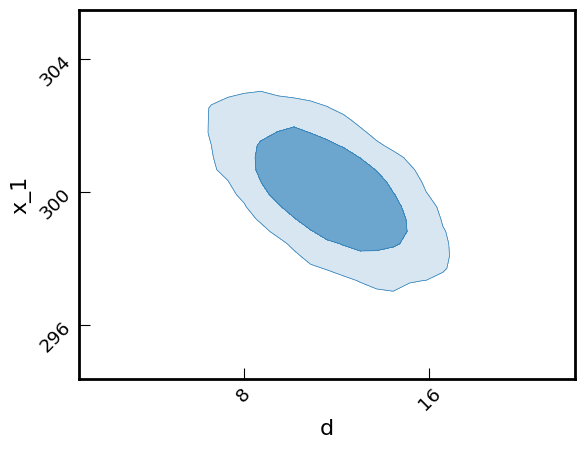

In [14]:
# Same with interpolation from getdist
# Note: this is a third part function and it requires to specify the path explicitally
an.histo2D_interp('d','x_1')


/opt/homebrew/lib/python3.11/site-packages/anesthetic/samples.py:1286: RuntimeWarning: 34 out of 33145 samples have logL <= logL_birth,
34 of which have logL == logL_birth.
This may just indicate numerical rounding errors at the peak of the likelihood, but further investigation of the chains files is recommended.
Dropping the invalid samples.
  warnings.warn("%i out of %i samples have logL <= logL_birth,"


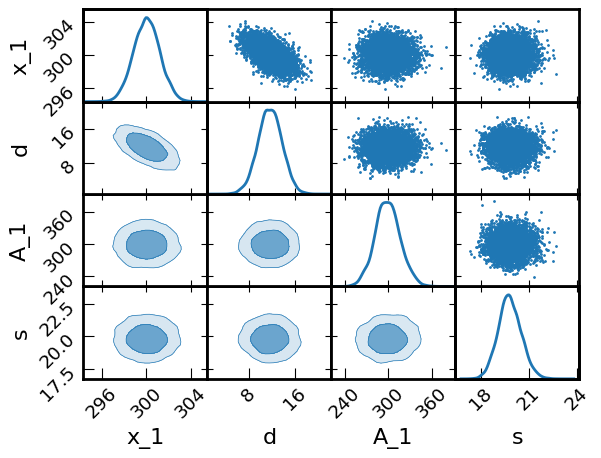

In [15]:
# Triangle plot (from anesthetic) to have a look to all parameters at the same time
an.triangle_plot(['x_1','d','A_1','s'])

# Extract important data and post-processing
The results can be extracted by the output of the python function: `out = conf.sample()`
Alternatively, another function can be used to read the output ASCII files (`output = an.read_output()`) or the `.json` finles

### Using the python function output

In [16]:
# Extract the raw information of evidence
out[ 'evidence']

{'stddev': 0.0, 'uncertainty': 0.1308439281620222, 'value': -469.2265891009946}

In [17]:
# Specific information of output parameters
par_name = 'x_1'
print(par_name, ' = ', out['params'][par_name][ 'mean'],' ± ', out['params'][par_name][ 'std'])

x_1  =  300.05395878063007  ±  1.1720328422063018


In [18]:
# Miscelaneous information
out['meta']

{'bayes_complexity': 7.02243551623576,
 'information': 17.120133536868423,
 'minimal_req_it': 27238270,
 'ncores': 10,
 'timereal': 20.552711999975145,
 'timetotal': 91.393156}

### Using the built in function 'read_output'

In [19]:
# Read the output files in a dictionnary
out = an.read_output()

# Print some results

# The evidence
print('Evidence = ', out['evidence'],'±',out['evidence_err_est'])

# The Bayesian complexity
print('Complexity = ', out['complexity'])

# Some parameter
par_name = 'x_1'
par_index = out['par_name'].index('x_1')
print(par_name, ' = ', out['mean'][par_index],' ± ', out['sd'][par_index])

Evidence =  -469.2265891009946 ± 0.1308439281620222
Complexity =  7.02243551623576
x_1  =  300.05395878063007  ±  1.1720328422063018


In [20]:
# Statistics (from anesthetic) to have a good estimation of the uncertainties (expecially for the evidence)
an.stats()

/opt/homebrew/lib/python3.11/site-packages/anesthetic/samples.py:1286: RuntimeWarning: 34 out of 33145 samples have logL <= logL_birth,
34 of which have logL == logL_birth.
This may just indicate numerical rounding errors at the peak of the likelihood, but further investigation of the chains files is recommended.
Dropping the invalid samples.
  warnings.warn("%i out of %i samples have logL <= logL_birth,"


logZ 	 = -469.232935 	± 0.136877
D_KL 	 = 17.123256 	± 0.119176
logL_P 	 = -452.109679 	± 0.049682
d_G 	 = 7.097194 	± 0.180985
